# 精准度-召回率曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
# 默认的情况下，根据score大于0还是小于0来做决定
# 这里确认出一个决策边界的数组，从最小的那个score开始，到最大的那个score为止，每次增进0.1
# 然后获取不同的精准率和召回率
thresholds = np.arange(
    np.min(decision_scores), 
    np.max(decision_scores), 
    0.1
)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

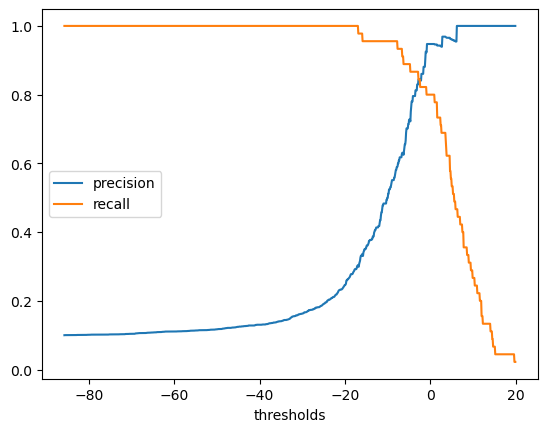

In [6]:
plt.plot(thresholds, precisions, label="precision")
plt.plot(thresholds, recalls, label="recall")
plt.xlabel("thresholds")
plt.legend()
plt.show()

### Precision-Recall 曲线

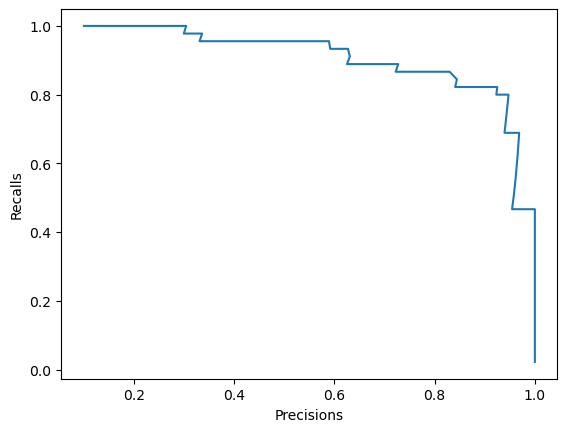

In [7]:
plt.plot(precisions, recalls)
plt.xlabel("Precisions")
plt.ylabel("Recalls")
plt.show()

上图中不难观察到，曲线平缓的下降，但是在某个点突然开始陡峭的下降。这个陡峭的下降开始的地方，也许就是相对而言，精准率，召回率最好的平衡点。

### scikit-learn中的Precision-Recall曲线

In [8]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [9]:
precisions.shape # 这个步长实在sklearn的precision_recall_curve中自动定义的。

(149,)

In [10]:
recalls.shape

(149,)

In [11]:
# 注意阈值的shape比recall/precision少 1
# 最后1个精确率和召回率的值，分别是1和0(参阅文档)
# 这个值没有threshold
thresholds.shape 

(148,)

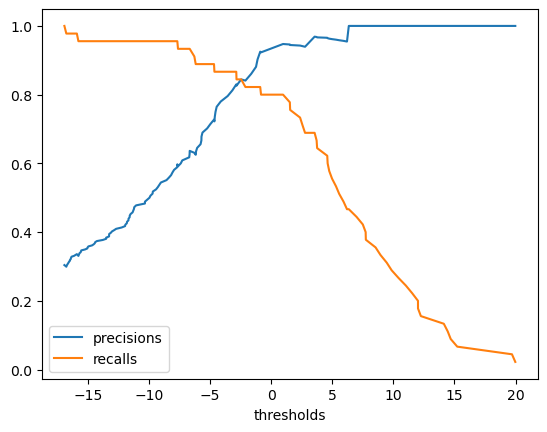

In [14]:
plt.plot(thresholds, precisions[:-1], label="precisions")
plt.plot(thresholds, recalls[:-1], label="recalls")
plt.xlabel("thresholds")
plt.legend()

sklearn画出的图和自己画出的图是不一样的，自己画的图从最小找到最大，sklearn只使用了它认为最重要的那个区间

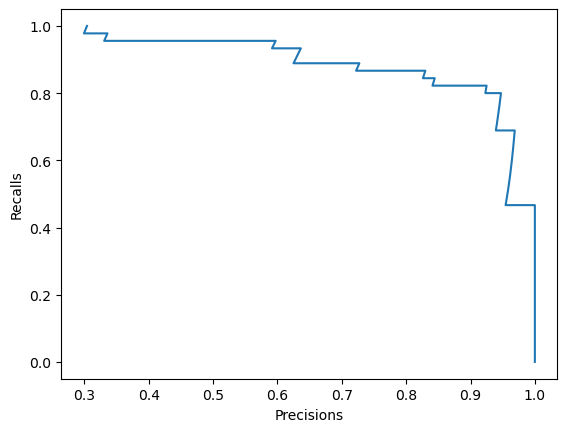

In [15]:
plt.plot(precisions, recalls)
plt.xlabel("Precisions")
plt.ylabel("Recalls")
plt.show()